# Plot trajectory-activation data

Example Plot:</br>

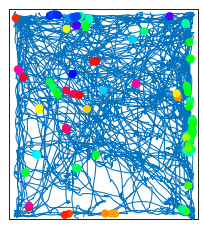



### Download data files and set path

In [ ]:
!wget --no-check-certificate "https://raw.githubusercontent.com/hasselmonians/Programming-iterview/master/20221129_kimchi_session1_LOF_DLC.csv"
!wget --no-check-certificate "https://raw.githubusercontent.com/hasselmonians/Programming-iterview/master/20221129_timeseries_events_run1.csv"
!pip install matplotlib,numpy,pandas

In [ ]:
tracking_file = '20221129_kimchi_session1_LOF_DLC.csv'
cell_activation = '20221129_timeseries_events_run1.csv'

### Import modules

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from math import atan2,pi

colormap = cm.get_cmap('plasma')

### Define Body Parts and video metadata

In [ ]:
body_parts = ['Snout','Left Ear','Right Ear','Head Base','Midpoint of Body','Tail Base']
cell_columns = ['Time', 'Cell Name', 'Value']
framerate = 60

## Load 2D Tracking data and activation data

In [ ]:
data = pd.read_csv(tracking_file, header=[0, 1, 2], index_col=0, dtype='unicode')
scorer = data.columns[0][0]
num_frames = len(data)
cell_data = pd.read_csv(cell_activation)
cell_data = cell_data[cell_data['Cell Name']==' C178'] # Focus on one cell
cell_data = cell_data[cell_data['Time']<900] # The length of the tracked session.

### Helper Functions
* get_marker(index,name)
    - index : Frame number
    - name : Name of the body part
    - Returns 2D location and likelihood in a numpy array.
    </br> example: ```get_marker(0,'Snout')``` -> ```np.array([x,y,likelihood])```
* iter_rows()
    - iterate over the tracking information. It is more optimized for sequential access.
    - Returns a tuple containing the frame number and a dictionary where the keys are the body parts and the values are corresponding x,y,likelihood.
* get_angle(x,y)
    - x : x coordinate
    - y : y coordinate
    - Returns angle  between 0 and 2*π
* get_color(angle)
    - angle : desired angle
    - Returns corresponding color

In [ ]:
def get_marker(index, name):
    if index in data.index:
        return np.array([data.loc[index, (scorer, name, 'x')], data.loc[index, (scorer, name, 'y')],data.loc[index, (scorer, name, 'likelihood')]],dtype=np.float32)
    
def iter_rows():
    for index,row in data.iterrows():
        yield index,{name:np.array([row[(scorer, name, 'x')], row[(scorer, name, 'y')],row[(scorer, name, 'likelihood')]],dtype=np.float32)
               for name in body_parts}
        
def get_angle(x,y):
    return atan2(y,x)+pi

def get_color(angle):
    return colormap(angle/(2*pi))

### Convert seconds to nearest integer frame number

```Hint: Framerate of 60 = 60 frames per second.```

In [ ]:
def convert_to_frame_number(seconds):
    raise NotImplementedError("Implement Here")

Iterate over the cell activation data and store cell name, value, and the nearest frame number when it was active in a data structure.

Useful functions

* Pandas
    - [iterrows](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html)
    - [map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html),[apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [ ]:
#Implement Here

Compute Rodent's position by averaging 'Snout', 'Head Base', 'Midpoint of Body'.

Compute Rodent's head direction, defined by a vector from Head Base to Snout.

Store them in a data structure for the plot.

You can ignore the likelihood values.

Hint: Use ```get_marker``` or ```iter_rows```

In [ ]:
position_x=[]
position_y=[]
head_direction = []
#Implement Here

Using the frame number, add position information and head direction angle to each cell activation.

Hint: If a cell was activated at 0 second, store the position of the rodent at that moment. Use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) and ```get_angle```

In [ ]:
#Implement Here

## Plot the data

#### Steps
1. Compute a list of colors based on the head direction angle for each cell activation.
    - Use ```get_color```.
2. Plot the trajectory : Useful Function: matplotlib - [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
    - Use ```linewidth``` to adjust the thickness, ```color``` to change the color.
3. Add cell markers to their corresponding positions of activation: Useful Function: matplotlib - [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
    - Use ```c``` to pass a list of color based on the head-direction angle, ```zorder``` to ensure the scatter plot is drawn above the trajectory

In [ ]:
#Implement Here
plt.xlim(350,1325)
plt.ylim(20,995)